- yolo2 - 20개 클래스
- yolo 9000 

In [1]:
import numpy as np
import argparse
import time
import cv2
import os

import matplotlib.pyplot as plt

In [2]:
labelsPath = "coco.names"
LABELS = open(labelsPath).read().strip().split("\n")

In [3]:
LABELS[1:5]

['bicycle', 'car', 'motorbike', 'aeroplane']

In [5]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [6]:
COLORS[0:5]

array([[102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245]], dtype=uint8)

In [8]:
weightsPath = "yolov3.weights"
configPath = "yolov3.cfg"

- opencv 

       - gpu쓸 수 있는데, 따로 compile 해 놓았다. 
    

yolov3.cfg에 옵션같은거 다 저장해 놓았다. 

In [31]:
[_ for _ in dir(cv2.dnn) if _.startswith('read')]

['readNet',
 'readNetFromCaffe',
 'readNetFromDarknet',
 'readNetFromModelOptimizer',
 'readNetFromONNX',
 'readNetFromTensorflow',
 'readNetFromTorch',
 'readTensorFromONNX',
 'readTorchBlob']

In [12]:
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [32]:
dir(net)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'connect',
 'dump',
 'dumpToFile',
 'empty',
 'enableFusion',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [34]:
# 구성이 어떻게 되어있는지 확인할 수 있다. 
# cfg파일에서도 확인할 수 있다. 
net.getLayerNames()

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [98]:
import tensorflow as tf 

In [233]:
image = cv2.imread('zebra.jpg')
imageorig = cv2.imread('zebra.jpg')
(H, W) = image.shape[:2]

In [234]:
# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [235]:
net.getUnconnectedOutLayers()
# unconnected layers (multi outputs)

array([[200],
       [227],
       [254]], dtype=int32)

In [236]:
ln

['yolo_82', 'yolo_94', 'yolo_106']

In [237]:
# 이미지를 blob형태로 집어넣어야한다. 
# opencv는 C계열이기 때문에, 값 get, 정할때는 set 
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

In [238]:
dir(layerOutputs)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [239]:
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 1.134343 seconds


In [240]:
boxes = []
confidences = []
classIDs = []

In [241]:
len(layerOutputs)
# scores, classID, confidence (확률)

3

In [242]:
# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > 0.15:
            # 크기 조절해주는 코드 
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [243]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
# NMSBoxes 
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.6,0.2)

In [244]:
# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        # 그림 그리는 코드 
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            1, color, 2)

In [245]:
import PIL.Image as Image

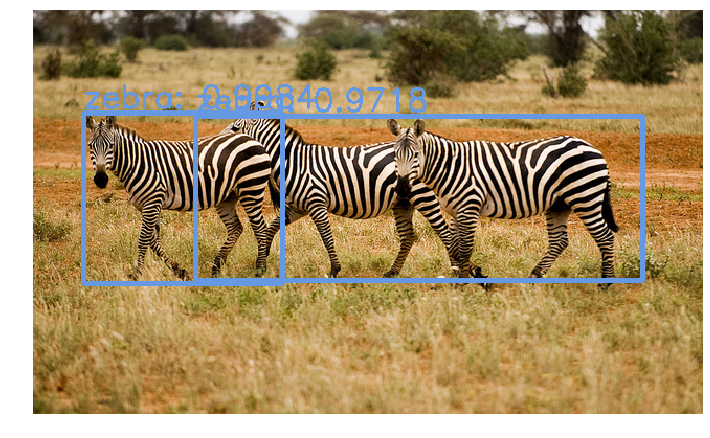

In [246]:
fig = plt.figure(figsize = (12,10))
plt.imshow(image[:,:,::-1])

plt.axis('off')
plt.savefig('table_yolo.jpg', dpi = 300)

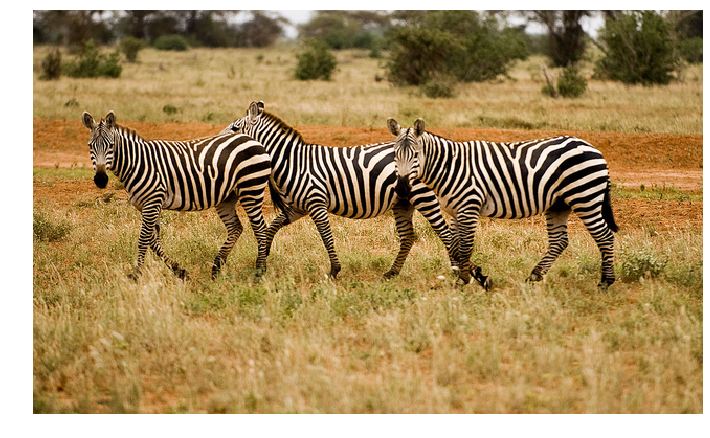

In [247]:
plt.figure(figsize = (12,10))
plt.imshow(imageorig[:,:,::-1])

plt.axis('off')
plt.savefig('table_orig.jpg', dpi = 300)